# Assignment 8 (10 Points): Pandas

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv('data/flights.csv')
airports = pd.read_csv('data/airports.csv')

### Q1 (3 points): Reverse engineer the following dataframe by merging the flights and airports datasets.

In [3]:
#Merging airports and flights data set by the FAA airport code
flights.join(airports)
merged_DF = flights[['origin', 'dest', 'tailnum']].merge(airports[['name', 'faa']], left_on = 'origin', right_on = 'faa')
merged_DF = merged_DF.drop('faa', axis = 'columns').rename(columns = {'name':'origin_name'})
merged_DF = merged_DF.merge(airports[['name','faa']], left_on = 'dest', right_on = 'faa')
merged_DF = merged_DF.drop('faa', axis = 'columns').rename(columns = {'name':'dest_name'})
merged_DF

,origin,dest,tailnum,origin_name,dest_name
0,EWR,IAH,N14228,Newark Liberty Intl,George Bush Intercontinental
1,EWR,IAH,N37408,Newark Liberty Intl,George Bush Intercontinental
2,EWR,IAH,N12216,Newark Liberty Intl,George Bush Intercontinental
3,EWR,IAH,N667UA,Newark Liberty Intl,George Bush Intercontinental
4,EWR,IAH,N39418,Newark Liberty Intl,George Bush Intercontinental
...,...,...,...,...,...
329169,JFK,MVY,N283JB,John F Kennedy Intl,Martha\\'s Vineyard
329170,JFK,MVY,N358JB,John F Kennedy Intl,Martha\\'s Vineyard
329171,JFK,MVY,N267JB,John F Kennedy Intl,Martha\\'s Vineyard
329172,JFK,MVY,N329JB,John F Kennedy Intl,Martha\\'s Vineyard


### Q2 (4 points): Use the resulting dataframe from Q1 to reverse engineer the following results (i.e., sorting the count of flights between the origin and destination airports).

In [4]:
#Using dataframe created above, and counting the number of unique flights between each origin and destination
group_SO = merged_DF.groupby(['origin_name', 'dest_name'])['tailnum'].agg(['count'])
group_SO.sort_values(by = 'count', ascending = False).rename(columns = {'count':'tailnum'})

tailnum
origin_name         dest_name                               
John F Kennedy Intl Los Angeles Intl                   11237
La Guardia          Hartsfield Jackson Atlanta Intl    10262
                    Chicago Ohare Intl                  8717
John F Kennedy Intl San Francisco Intl                  8174
La Guardia          Charlotte Douglas Intl              6114
...                                                      ...
John F Kennedy Intl Memphis Intl                           1
                    Lambert St Louis Intl                  1
                    Birmingham Intl                        1
La Guardia          Blue Grass                             1
Newark Liberty Intl La Guardia                             0

[217 rows x 1 columns]

### Q3 (3 points): Compute and plot the rolling mean and standard deviation of the price ratio between GOOG and NASDAQ.

- UCB stands for Upper Confidence Bound and is computed using mean + std.
- LCB stands for Lower Confidence Bound and is computed using mean - std.

In [5]:
GOOG = pd.read_csv('data/GOOG.csv', index_col = 0, parse_dates = ['Date'])
NASDAQ = pd.read_csv('data/NASDAQ.csv', index_col = 0, parse_dates = ['Date'])

GOOG = GOOG['Close']
NASDAQ = NASDAQ['Close']

In [14]:
ratio = GOOG/NASDAQ
#ratio between Google and Nasdaq

rolling_mean = ratio.rolling(window = 252, center = True).mean()
#rolling mean over 252 trading days in a year

std = ratio.rolling(window = 252, center = True).std()
#rolling standard deviation over 252 trading days in a year

UCB = rolling_mean + std
#mean + standard deviation

LCB = rolling_mean - std
#mean - standard deviation


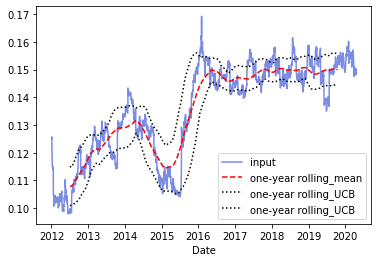

In [39]:
plt.plot(ratio, color = '#7B8CE2')
plt.plot(rolling_mean, 'r--')
plt.plot(UCB, 'k:')
plt.plot(LCB, 'k:')
#plotting values with desired linetypes and colors

plt.legend(["input",'one-year rolling_mean','one-year rolling_UCB','one-year rolling_UCB'], loc = "lower right")
#adding legend with lables as specified

plt.xlabel('Date')

plt.show()